In [ ]:
ximport torch
from torch import nn
import matplotlib.pylab as plt

torch.__version__

'2.3.1+cu121'

Data, preparing and loading

In [ ]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)


(50, 50)

In [ ]:
# train/test split

train_split = int(0.8* len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_labels, c="b", s=4, label="Train")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14})

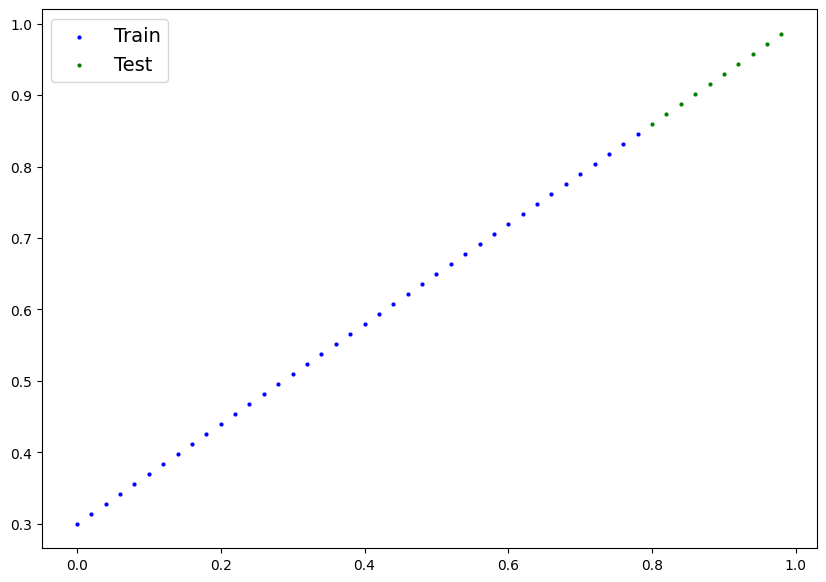

In [ ]:
plot_predictions()

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))


  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

- torch.nn
- torch.nn.Parameter
- torch.nn.Module


In [ ]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)

with torch.no_grad():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

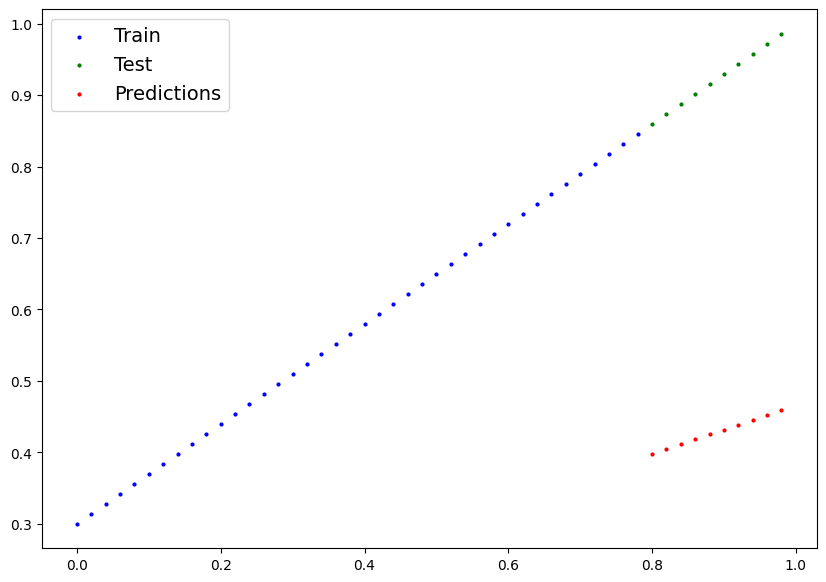

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
list(model_0.parameters()), model_0.state_dict()

([Parameter containing:
  tensor([0.3367], requires_grad=True),
  Parameter containing:
  tensor([0.1288], requires_grad=True)],
 OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]))

In [ ]:
# loss fn
loss_fn = nn.L1Loss()

# optimizer
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr = 0.01)

In [ ]:
torch.manual_seed(42)

epoch_count = []
loss_values = []
test_loss_values = []

# training loop
epochs = 200 # hyperparam

for epoch in range(epochs):
  model_0.train() # set train mode

  # 1. do the forward pass
  y_pred = model_0.forward(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. zero grad optimizer
  optimizer.zero_grad()

  # 4. Backward pass
  loss.backward()

  #5. Optimizer
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if not (epoch % 10):
    epoch_count.append(epoch), loss_values.append(loss), test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

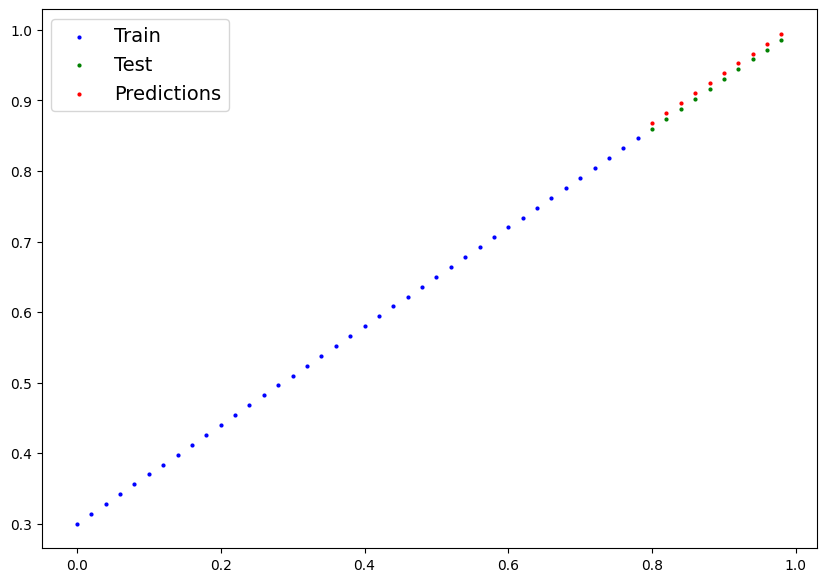

In [ ]:
plot_predictions(predictions = test_pred)

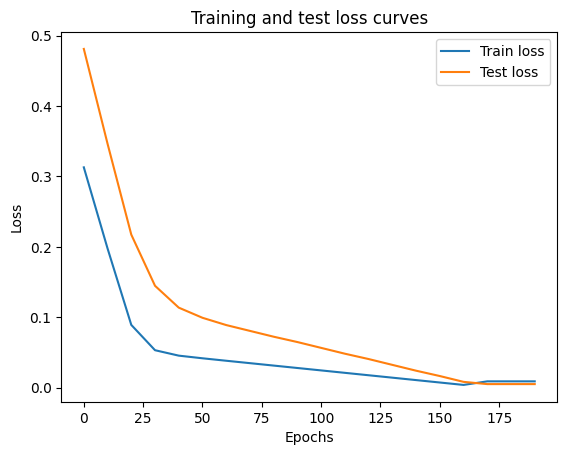

In [ ]:
import numpy as np

plt.plot(epoch_count, np.array(torch.tensor(loss_values)), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
np.array(torch.tensor(loss_values))

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
       0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
       0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
      dtype=float32)

### Saving and Loading

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_worflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

In [ ]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
model_0.state_dict(), loaded_model_0.state_dict()

(OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))]),
 OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))]))

In [ ]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [1]:
# summary
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.3.1+cu121'

In [3]:
# device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [4]:
# creating the dataset

# desired params
weight = 0.7
bias = 0.3

# creating the data
X = torch.arange(start=0, end=1, step=0.02, device=device).unsqueeze(dim=1)
y = weight * X + bias

In [5]:
# split into test and train sets
# 80/20
train = int(len(X) * 0.8)
X_train, X_test = X[:train], X[train:]
y_train, y_test = y[:train], y[train:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
# creating the plot function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data.cpu().numpy(), train_labels.cpu().numpy(), c = "r", s = 4, label = "Train")
  plt.scatter(test_data.cpu().numpy(), test_labels.cpu().numpy(), c = "g", s = 4, label = "Test")

  if predictions is not None:
    plt.scatter(test_data.cpu().numpy(), predictions.cpu().numpy(), c = "b", s = 4, label = "Predictions")

  plt.legend(prop={"size":14})


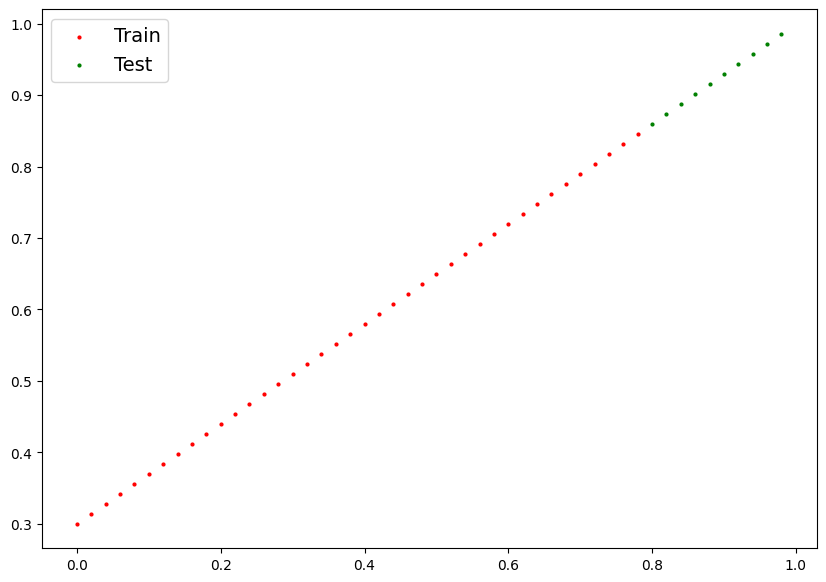

In [7]:
plot_predictions()

In [8]:
# Creating our Linear Model

class LinearRegressionModel(nn.Module):
  def __init__(self) -> None:
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                               dtype=torch.float,
                               device=device))

    self.bias = nn.Parameter(torch.randn(1,
                            dtype=torch.float,
                            device=device))

  def forward(self, x):
    return self.weights * x + self.bias

In [9]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(model_0.parameters(),
                         lr=0.01)

In [12]:
epochs = 200

epoch_count = []
train_loss_values = []
test_loss_values = []

for epoch in range(epochs):
  model_0.train()

  # 1. Forward pass
  train_preds = model_0.forward(X_train)

  # 2. Loss
  train_loss = loss_fn(train_preds, y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. backward pass
  train_loss.backward()

  # 5. optimize
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_preds = model_0.forward(X_test)
    test_loss = loss_fn(test_preds, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch), train_loss_values.append(train_loss), test_loss_values.append(test_loss)
    print(f"Epoch: {epoch}\tTrain loss: {train_loss}\tTest loss: {train_loss}")

Epoch: 0	Train loss: 0.008932482451200485	Test loss: 0.008932482451200485
Epoch: 10	Train loss: 0.008932482451200485	Test loss: 0.008932482451200485
Epoch: 20	Train loss: 0.008932482451200485	Test loss: 0.008932482451200485
Epoch: 30	Train loss: 0.008932482451200485	Test loss: 0.008932482451200485
Epoch: 40	Train loss: 0.008932482451200485	Test loss: 0.008932482451200485
Epoch: 50	Train loss: 0.008932482451200485	Test loss: 0.008932482451200485
Epoch: 60	Train loss: 0.008932482451200485	Test loss: 0.008932482451200485
Epoch: 70	Train loss: 0.008932482451200485	Test loss: 0.008932482451200485
Epoch: 80	Train loss: 0.008932482451200485	Test loss: 0.008932482451200485
Epoch: 90	Train loss: 0.008932482451200485	Test loss: 0.008932482451200485
Epoch: 100	Train loss: 0.008932482451200485	Test loss: 0.008932482451200485
Epoch: 110	Train loss: 0.008932482451200485	Test loss: 0.008932482451200485
Epoch: 120	Train loss: 0.008932482451200485	Test loss: 0.008932482451200485
Epoch: 130	Train loss: 

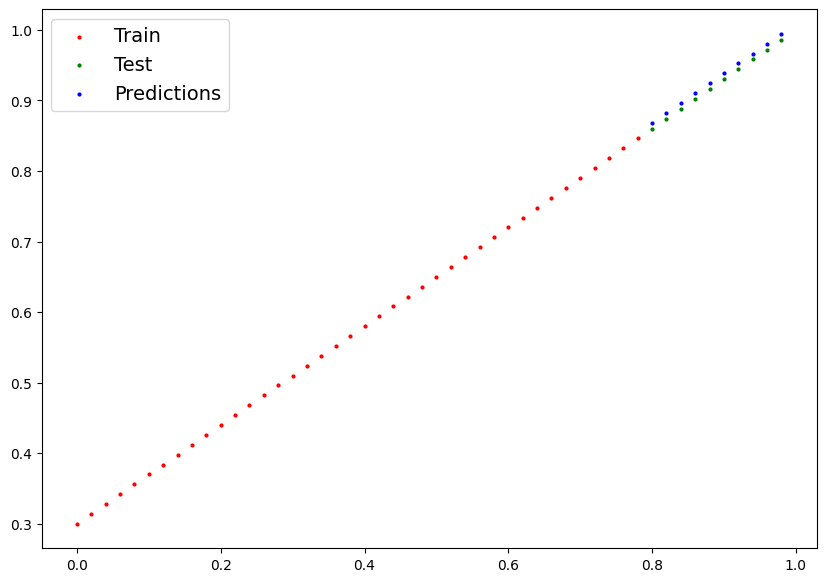

In [13]:
with torch.inference_mode():
  y_preds = model_0.forward(X_test)

plot_predictions(predictions=y_preds)
# y_preds

In [20]:
import numpy as np
torch.tensor(train_loss_values)

tensor([0.0089, 0.0089, 0.0089, 0.0089, 0.0089, 0.0089, 0.0089, 0.0089, 0.0089,
        0.0089, 0.0089, 0.0089, 0.0089, 0.0089, 0.0089, 0.0089, 0.0089, 0.0089,
        0.0089, 0.0089])

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

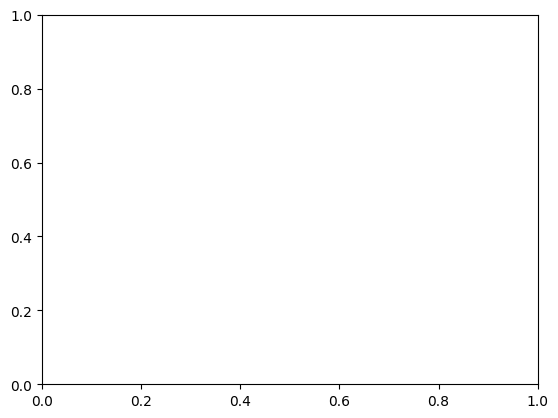

In [15]:
plt.plot(epoch_count, train_loss_values)